In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns

In [2]:
fname = '../../../zenodo/data/features.csv'
features = pd.read_csv(fname, index_col=False)

Ia_labels = [item if item == 'Ia' else 'non_Ia' for item in features['type'].values]
features['Ia_labels'] = Ia_labels

In [3]:
min(abs(features['a_g']))


1.1393480072576069e-06

In [4]:
features2 = features.sample(n=5000, replace=False)

flag1 = np.logical_and(features2['a_g'] > -1, features2['a_g']< 5)
flag2 = np.logical_and(features2['b_g'] >-75, features2['b_g'] < 200)
flag3 = np.logical_and(features2['c_g']<10**5, flag2)
flag4 = np.logical_and(features2['chisq_g']<10**5, flag3)
flag = np.logical_and(flag1, flag4)

type_flag = features2[flag]['Ia_labels'].values == 'Ia'

flag1x = np.logical_and(features2['a_r'] > -1, features2['a_r']< 5)
flag2x = np.logical_and(features2['b_r'] >-75, features2['b_r'] < 200)
flag3x = np.logical_and(features2['c_r']<10**5, flag2x)
flag4x = np.logical_and(features2['chisq_r']<10**5, flag3x)
flag5x = np.logical_and(flag1x, flag4x)
flagx = np.logical_and(flag5x, flag)

type_flagx = features2[flagx]['Ia_labels'].values == 'Ia'

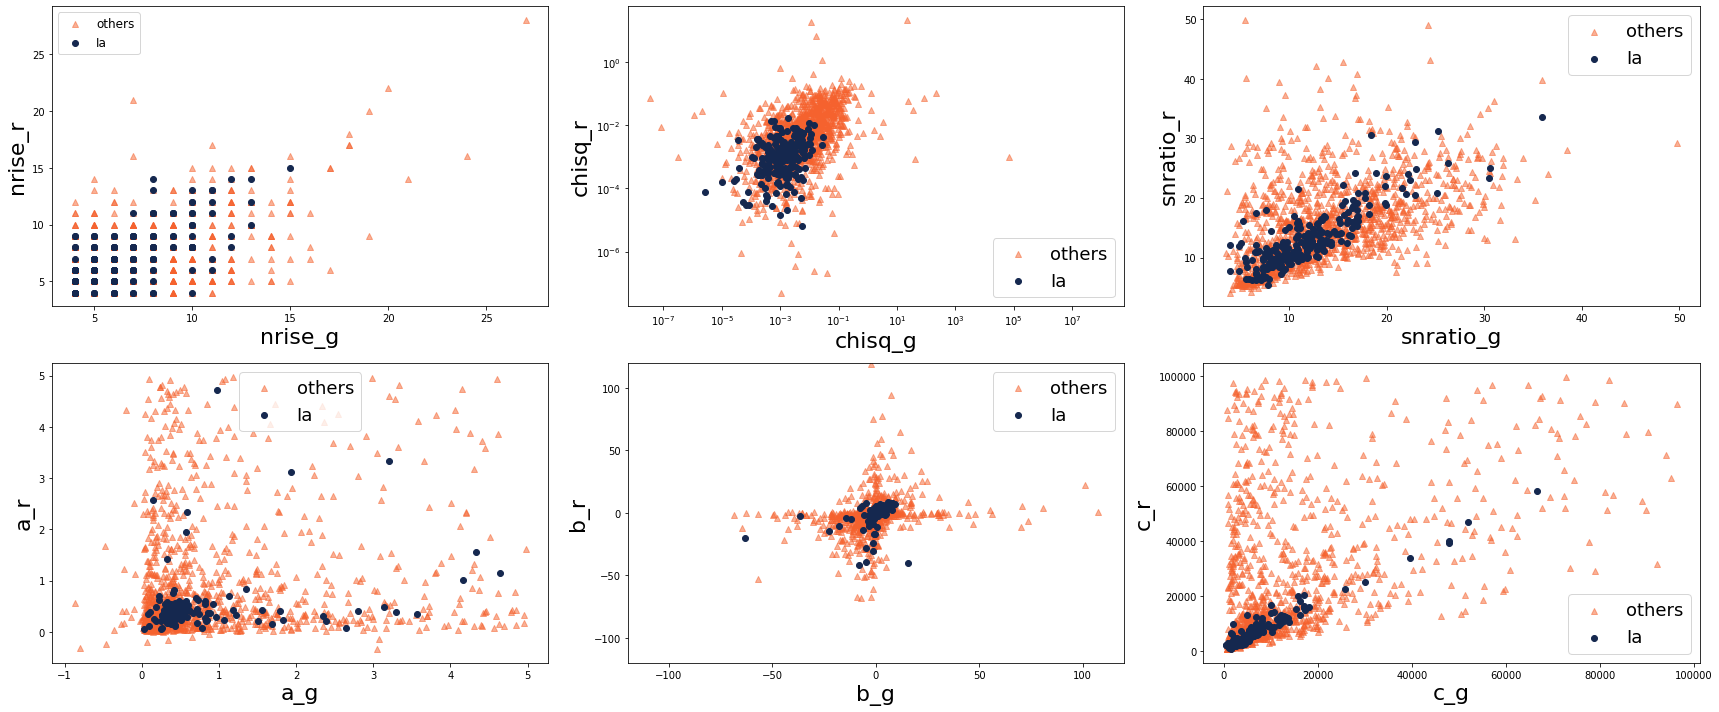

In [5]:
c = ['#15284F', '#F5622E']

p11x = 'nrise_g'
p11y = 'nrise_r'

p12x = 'chisq_g'
p12y = 'chisq_r'

p13x = 'snratio_g'
p13y = 'snratio_r'

p21x = 'a_g'
p21y = 'a_r'

p22x = 'b_g'
p22y = 'b_r'

p23x = 'c_g'
p23y = 'c_r'


fs = 22
ls = 18

plt.figure(figsize=(24,10))

plt.subplot(2,3,1)
plt.scatter(features2[flagx][~type_flagx][p11x], features2[flagx][~type_flagx][p11y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx][p11x], features2[flagx][type_flagx][p11y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
plt.xlabel(p11x, fontsize=fs)
plt.ylabel(p11y, fontsize=fs)
plt.legend(fontsize=12, loc='upper left')
#plt.xscale('log')

plt.subplot(2,3,2)
plt.scatter(features2[flagx][~type_flagx][p12x], features2[flagx][~type_flagx][p12y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx][p12x], features2[flagx][type_flagx][p12y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
plt.scatter([1e8], [1e-7], color='white')
plt.xlabel(p12x, fontsize=fs)
plt.ylabel(p12y, fontsize=fs)
plt.legend(fontsize=ls, loc='lower right')
plt.xscale('log')
plt.yscale('log')

plt.subplot(2,3,3)
plt.scatter(features2[flagx][~type_flagx][p13x], features2[flagx][~type_flagx][p13y],
            color=c[1], alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx][p13x], features2[flagx][type_flagx][p13y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
plt.xlabel(p13x, fontsize=fs)
plt.ylabel(p13y, fontsize=fs)
plt.legend(fontsize=ls)
#plt.yscale('log')

plt.subplot(2,3,4)
plt.scatter(features2[flagx][~type_flagx][p21x], features2[flagx][~type_flagx][p21y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx][p21x], features2[flagx][type_flagx][p21y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
plt.xlabel(p21x, fontsize=fs)
plt.ylabel(p21y, fontsize=fs)
plt.legend(fontsize=ls)
#plt.xscale('log')
#plt.yscale('log')

plt.subplot(2,3,5)
plt.scatter(features2[flagx][~type_flagx][p22x], features2[flagx][~type_flagx][p22y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx][p22x], features2[flagx][type_flagx][p22y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
plt.xlabel(p22x, fontsize=fs)
plt.ylabel(p22y, fontsize=fs)
plt.legend(fontsize=ls)
plt.xlim(-120, 120)
plt.ylim(-120, 120)

plt.subplot(2,3,6)
plt.scatter(features2[flagx][~type_flagx][p23x], features2[flagx][~type_flagx][p23y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
plt.scatter(features2[flagx][type_flagx][p23x], features2[flagx][type_flagx][p23y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
plt.xlabel(p23x, fontsize=fs)
plt.ylabel(p23y, fontsize=fs)
plt.legend(fontsize=ls)


plt.tight_layout()

plt.show()
#plt.savefig('../../plots/features.pdf')